In [ ]:
# 1a Etapa: importação das bibliotecas utilizadas

In [171]:
import matplotlib.pyplot as plt
%matplotlib inline

#%matplotlib notebook

from sklearn import datasets



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


import numpy as np
np.set_printoptions(precision=2)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
#from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import pickle

In [172]:
# Leitura do arquivo est_data_CANDIDATE(2).csv

In [173]:
dados = pd.read_csv('test_data_CANDIDATE(2).csv')

In [174]:
# Análise exploratória dos dados

In [175]:
dados.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
0,0,49,M,10000,130,269.0,0,1,163,0,0.0,2.0,0,2,2,0,1,6797.761892
1,1,61,F,10000,138,166.0,0,0,125,1,3.6,NaN,1,2,2,1,3,4307.686943
2,2,46,F,10000,140,311.0,0,1,120,1,1.8,NaN,2,3,2,0,1,4118.077502
3,3,69,F,10000,140,254.0,0,0,146,0,2.0,1.0,3,3,2,1,0,7170.849469
4,4,51,F,10000,100,222.0,0,1,143,1,1.2,1.0,0,2,2,1,0,5579.040145


In [176]:
dados

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
0,0,49,M,10000,130,269.0,0,1,163,0,0.0,2.0,0,2,2,0,1,6797.761892
1,1,61,F,10000,138,166.0,0,0,125,1,3.6,NaN,1,2,2,1,3,4307.686943
2,2,46,F,10000,140,311.0,0,1,120,1,1.8,NaN,2,3,2,0,1,4118.077502
3,3,69,F,10000,140,254.0,0,0,146,0,2.0,1.0,3,3,2,1,0,7170.849469
4,4,51,F,10000,100,222.0,0,1,143,1,1.2,1.0,0,2,2,1,0,5579.040145
5,5,51,F,10000,140,299.0,0,1,173,1,1.6,2.0,0,3,2,0,0,3267.628751
6,6,58,F,10000,120,284.0,0,0,160,0,1.8,1.0,0,2,2,0,0,6556.847684
7,7,58,F,10000,125,220.0,0,1,144,0,0.4,NaN,4,3,2,1,1,5120.660542
8,8,47,F,10000,112,204.0,0,1,143,0,0.1,NaN,0,2,2,0,1,6540.095874
9,9,66,M,10000,150,226.0,0,1,114,0,2.6,NaN,0,2,2,1,1,4784.963444


In [177]:
dados.columns

Index(['index', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'nar', 'hc', 'sk',
       'trf'],
      dtype='object')

In [178]:
dados.shape

(288, 18)

In [179]:
dados.count()

index       288
age         288
sex         288
cp          288
trestbps    288
chol        272
fbs         288
restecg     288
thalach     288
exang       288
oldpeak     288
slope       145
ca          288
thal        288
nar         288
hc          288
sk          288
trf         288
dtype: int64

In [180]:
dados.count

<bound method DataFrame.count of      index  age sex     cp  trestbps   chol  fbs  restecg  thalach  exang  \
0        0   49   M  10000       130  269.0    0        1      163      0   
1        1   61   F  10000       138  166.0    0        0      125      1   
2        2   46   F  10000       140  311.0    0        1      120      1   
3        3   69   F  10000       140  254.0    0        0      146      0   
4        4   51   F  10000       100  222.0    0        1      143      1   
5        5   51   F  10000       140  299.0    0        1      173      1   
6        6   58   F  10000       120  284.0    0        0      160      0   
7        7   58   F  10000       125  220.0    0        1      144      0   
8        8   47   F  10000       112  204.0    0        1      143      0   
9        9   66   M  10000       150  226.0    0        1      114      0   
10      10   64   F  10000       110  211.0    0        0      144      1   
11      11   58   M  10000       170  225.0

In [181]:
# Vamos obter info sobre a tipagem das variáveis:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 18 columns):
index       288 non-null int64
age         288 non-null int64
sex         288 non-null object
cp          288 non-null int64
trestbps    288 non-null int64
chol        272 non-null float64
fbs         288 non-null int64
restecg     288 non-null int64
thalach     288 non-null int64
exang       288 non-null int64
oldpeak     288 non-null float64
slope       145 non-null float64
ca          288 non-null int64
thal        288 non-null int64
nar         288 non-null int64
hc          288 non-null int64
sk          288 non-null int64
trf         288 non-null float64
dtypes: float64(4), int64(13), object(1)
memory usage: 40.6+ KB


In [182]:
# analisando os valores distintos das features e da var. resposta
# no dataset:
for col in dados.columns:
    print('Distinct values for feature', col)
    print(pd.unique(dados[[col]].values.ravel('K')))
    print('\n')
    print('\n')

Distinct values for feature index
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 

In [183]:
# Das análises dos valores distintos acima vemos que:

# - A variável sex tem labels maiúsculos e minúsculos para significar a mesma coisa.
# Deve-se uniformizar essses labels. Iremos substituir os lables minúsculos pelos maiúsculos.

# A feature "cp" não tem valores distintos, funcionando como uma constante, ao menos no dataset fornecido.
# Não introduz informação para o treinamento o método de Machine Learning que 
# iremos implementar. Essa variável será eliminada do dataset para fins de treinamento dos algoritmos preditivos
# NESTE NOTEBOOK. Porém, nos dados  vindouros que alimnetarão o modelo em produção, no ambiente virtual,
# não há como se garantir que essa feature irá permenecer com variância zero.
# NO entanto, o modelo treinado, para ser deployed no ambiente virtual, necessita de um número definido de features,
# e ortanto foi treinado com um número definido de features 
#e não se deve incluir uma feature com variância zero nesse treinamento
# Como o modelo deployed no ambiente virtual deve ser treinado apenas 
#no conjunto de dados fornecido 
# e deve fazer previsões para dados futuros (onde não se pode garantir que 
#a variância da feature 
# cp vai ser continuar sendo zero), para fins de simplificação dos pipelines
# se irá incluir neste notebook e no pipeline do arquivo .py 
#um procedimento para eliminação automática 
# desta feature.

# Não se procedendo desta forma, se tornaria o pipeline no arquivo .py muito mais complexo 
# pois teríamos que checar se a variância da feature cp em todo novo conjunto de dados que 
#irá inputar o modelo no ambiente virtual
# no futuro, tem variÂncia zero. Caso positivo o pipeline atual valeria, 
#senão teríamos um segundo pipeline, alternativo, que iria retreinar o modelo com 
# os novos dados; incluindo esta feature!!!
# Por este motivo, para fins de simplificação, se irá adotar aqui 
#a eliminação automática da feature (no arquivo .py)
# 

# A feature "slope" tem muitos valores faltantes. Se formos eliminar todas as linhas
# do dataset com valores faltantes desta feature, iriámos perder parte substancial dos dados
#  isso implica em:

# 1) na necessidade de se substituir esses valores faltantes com alguma informação útil; por exemplo 
# substituir seus valores faltantes por previões de modelos de Machine Learning
# utilizando-se outras features do mesmo dataset; o que  implicaria primeiramente, em  haver 
# outras features correlacionadas com esta feature (linear ou não linearmente)
# para se poder prever seus valores valores faltantes a pertir destas outars features correlacionadas 
# ( O QUE NÃO SE VERIFICOU NO DATASET, como pode ser visto neste notebook).
# Se viável, Isso tornaria também, a produtivização do modelo no ambiente virtual 
# extremamente complexa para fins deste exercício.

# 2) se tentar criar regras para substituição de seus valores faltantes a partir de padrões de 
# correlação com outras features, através de gráficos de co plot,  sem se propriament6e treinar outros modelos preditivos 
# somente para esta tarefa. Analisando-se os gráficos de pair plot entre as demais features e a feature slope,
# não se eoncontrou um padrão que pudesse apoiar uma substituição segura dos valores faltantes de slope. Por este motivo essa opção
# não pode ser considerada para substituir valores faltantes de slope.

# 3) Usar informalções de domínio, das areas médicas, para se sibstituir os missing values de slope. 
# INfelizmente não se encontrou informações que pudessem apoiar esta linha de ação.

# 4) Eliminação por completo desta feature (slope), tanto para treinamento como para futuras previsões do modelo treinado.
# POr falta de opções, esta foi alinha adotada.

# A feature slope, apesar de representar inclinação do segmento ST no pico do exercício
#é float, embora no dataset ela só assuma valores de 0.0, 1.0 e 2.0, 
# iremos assumir, por desconhecimento de domínio na área, que ela pode assumir outros valores floats 
# além desses e portanto deixaremos seu tipo como float também.

# Não há necessidade da coluna index, devendo esta sewr eliminada do dataset



In [184]:
# Como já mencionado anteriormente não há informações faltantes no banco de dados
dados.isnull().sum()

index         0
age           0
sex           0
cp            0
trestbps      0
chol         16
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope       143
ca            0
thal          0
nar           0
hc            0
sk            0
trf           0
dtype: int64

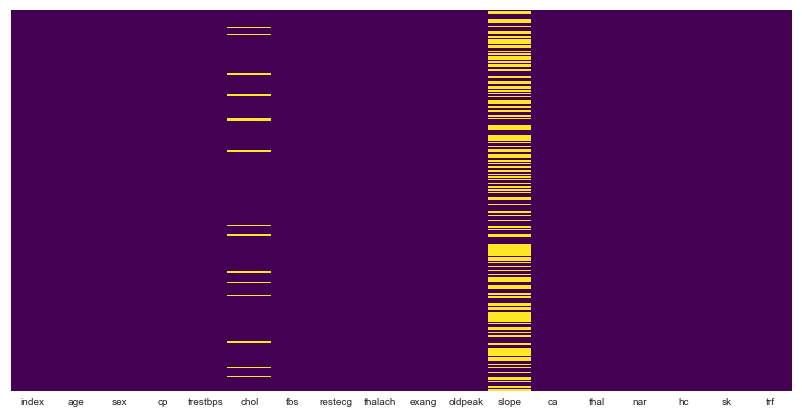

In [185]:
# Heatmap dos missing values da base de dados incial
plt.figure(figsize=(14,7))
plt.tight_layout()
sns.heatmap(dados.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [186]:
# Verifica-se novamente, no Heat map acima que a feature slope possui muitas observações faltantes.

In [187]:
# Teste 2 para tornar a variável sex em upper case todos os casos
dados['sex'] = dados['sex'].str.upper()
dados

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,nar,hc,sk,trf
0,0,49,M,10000,130,269.0,0,1,163,0,0.0,2.0,0,2,2,0,1,6797.761892
1,1,61,F,10000,138,166.0,0,0,125,1,3.6,NaN,1,2,2,1,3,4307.686943
2,2,46,F,10000,140,311.0,0,1,120,1,1.8,NaN,2,3,2,0,1,4118.077502
3,3,69,F,10000,140,254.0,0,0,146,0,2.0,1.0,3,3,2,1,0,7170.849469
4,4,51,F,10000,100,222.0,0,1,143,1,1.2,1.0,0,2,2,1,0,5579.040145
5,5,51,F,10000,140,299.0,0,1,173,1,1.6,2.0,0,3,2,0,0,3267.628751
6,6,58,F,10000,120,284.0,0,0,160,0,1.8,1.0,0,2,2,0,0,6556.847684
7,7,58,F,10000,125,220.0,0,1,144,0,0.4,NaN,4,3,2,1,1,5120.660542
8,8,47,F,10000,112,204.0,0,1,143,0,0.1,NaN,0,2,2,0,1,6540.095874
9,9,66,M,10000,150,226.0,0,1,114,0,2.6,NaN,0,2,2,1,1,4784.963444


In [189]:
# Checando se a variável sex foi substituída adequadamente:
# analisando os valores distintos das features e da var. resposta
# no dataset:
for col in dados.columns:
    print('Distinct values for feature', col)
    print(pd.unique(dados[[col]].values.ravel('K')))
    print('\n')
    print('\n')

Distinct values for feature index
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 

In [190]:
# eliminando as colunas desnecessárias ou descartadas por motivos mencionados anteriomente
# eliminação das colunas index e cp

dados1 = dados.drop(['cp','index', 'slope'], axis = 1)
dados1.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
0,49,M,130,269.0,0,1,163,0,0.0,0,2,2,0,1,6797.761892
1,61,F,138,166.0,0,0,125,1,3.6,1,2,2,1,3,4307.686943
2,46,F,140,311.0,0,1,120,1,1.8,2,3,2,0,1,4118.077502
3,69,F,140,254.0,0,0,146,0,2.0,3,3,2,1,0,7170.849469
4,51,F,100,222.0,0,1,143,1,1.2,0,2,2,1,0,5579.040145


In [191]:
dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 15 columns):
age         288 non-null int64
sex         288 non-null object
trestbps    288 non-null int64
chol        272 non-null float64
fbs         288 non-null int64
restecg     288 non-null int64
thalach     288 non-null int64
exang       288 non-null int64
oldpeak     288 non-null float64
ca          288 non-null int64
thal        288 non-null int64
nar         288 non-null int64
hc          288 non-null int64
sk          288 non-null int64
trf         288 non-null float64
dtypes: float64(3), int64(11), object(1)
memory usage: 33.8+ KB


In [192]:
# Data wrangling inicial dos dados - OBSERVAÇÃO IMPORTANTE!!!

# INformação inicial importante:
# Como se irá utilizar um classificador preditivo do tipo Random Forest,
# não há a obrigatoriedade de se proceder ao scaling dos dados não-categóricos
# Além disso, não há a necessidade de OneHotEncoding nas features categóricas para metodos baseados 
# em árvores!!! Portanto estas etapas não serão implementadas aqui nem no arquivo .py!!!

In [193]:
# Mudando o tipo da variável resposta 'sex' para string

#df['column'] = df['column'].astype('str') 
dados1['sex'] = dados1['sex'].astype('str') 

In [194]:
# Mudando os labels da variável resposta 'sex' para numéricos

le = preprocessing.LabelEncoder()
dados1['sex'] = le.fit_transform(dados1['sex'])
#le.fit_transform(dados1[sex'])     
dados1.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
0,49,1,130,269.0,0,1,163,0,0.0,0,2,2,0,1,6797.761892
1,61,0,138,166.0,0,0,125,1,3.6,1,2,2,1,3,4307.686943
2,46,0,140,311.0,0,1,120,1,1.8,2,3,2,0,1,4118.077502
3,69,0,140,254.0,0,0,146,0,2.0,3,3,2,1,0,7170.849469
4,51,0,100,222.0,0,1,143,1,1.2,0,2,2,1,0,5579.040145


In [195]:
# Mudando o tipo da variável 'age' para int

#df['column'] = df['column'].astype('str') 
dados1['age'] = dados1['age'].astype('int') 

In [327]:
dados1.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
0,49,1,49,269.0,0,1,163,0,0.0,0,2,2,0,1,6797.761892
1,61,0,61,166.0,0,0,125,1,3.6,1,2,2,1,3,4307.686943
2,46,0,46,311.0,0,1,120,1,1.8,2,3,2,0,1,4118.077502
3,69,0,69,254.0,0,0,146,0,2.0,3,3,2,1,0,7170.849469
4,51,0,51,222.0,0,1,143,1,1.2,0,2,2,1,0,5579.040145


In [197]:
# Plots de variáveis no dataset todo o dataset

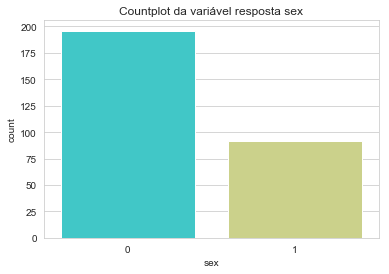

In [198]:
# Gráfico de contagem da variável-resposta sex

sns.set_style('whitegrid')
sns.countplot(x='sex',data=dados1,palette='rainbow').set_title('Countplot da variável resposta sex')
plt.show()

In [199]:
dados1.groupby('sex')['sex'].count()

sex
0    196
1     92
Name: sex, dtype: int64

In [200]:
# COmentário: observa-se qu antes da eliminação de potenciais outliers do dataset
# as classes da variável resposta sex são desbalanceadas, com aproximadamente o dobro de casos com 
# pacientes do sexo feminino

C:\soft\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\soft\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


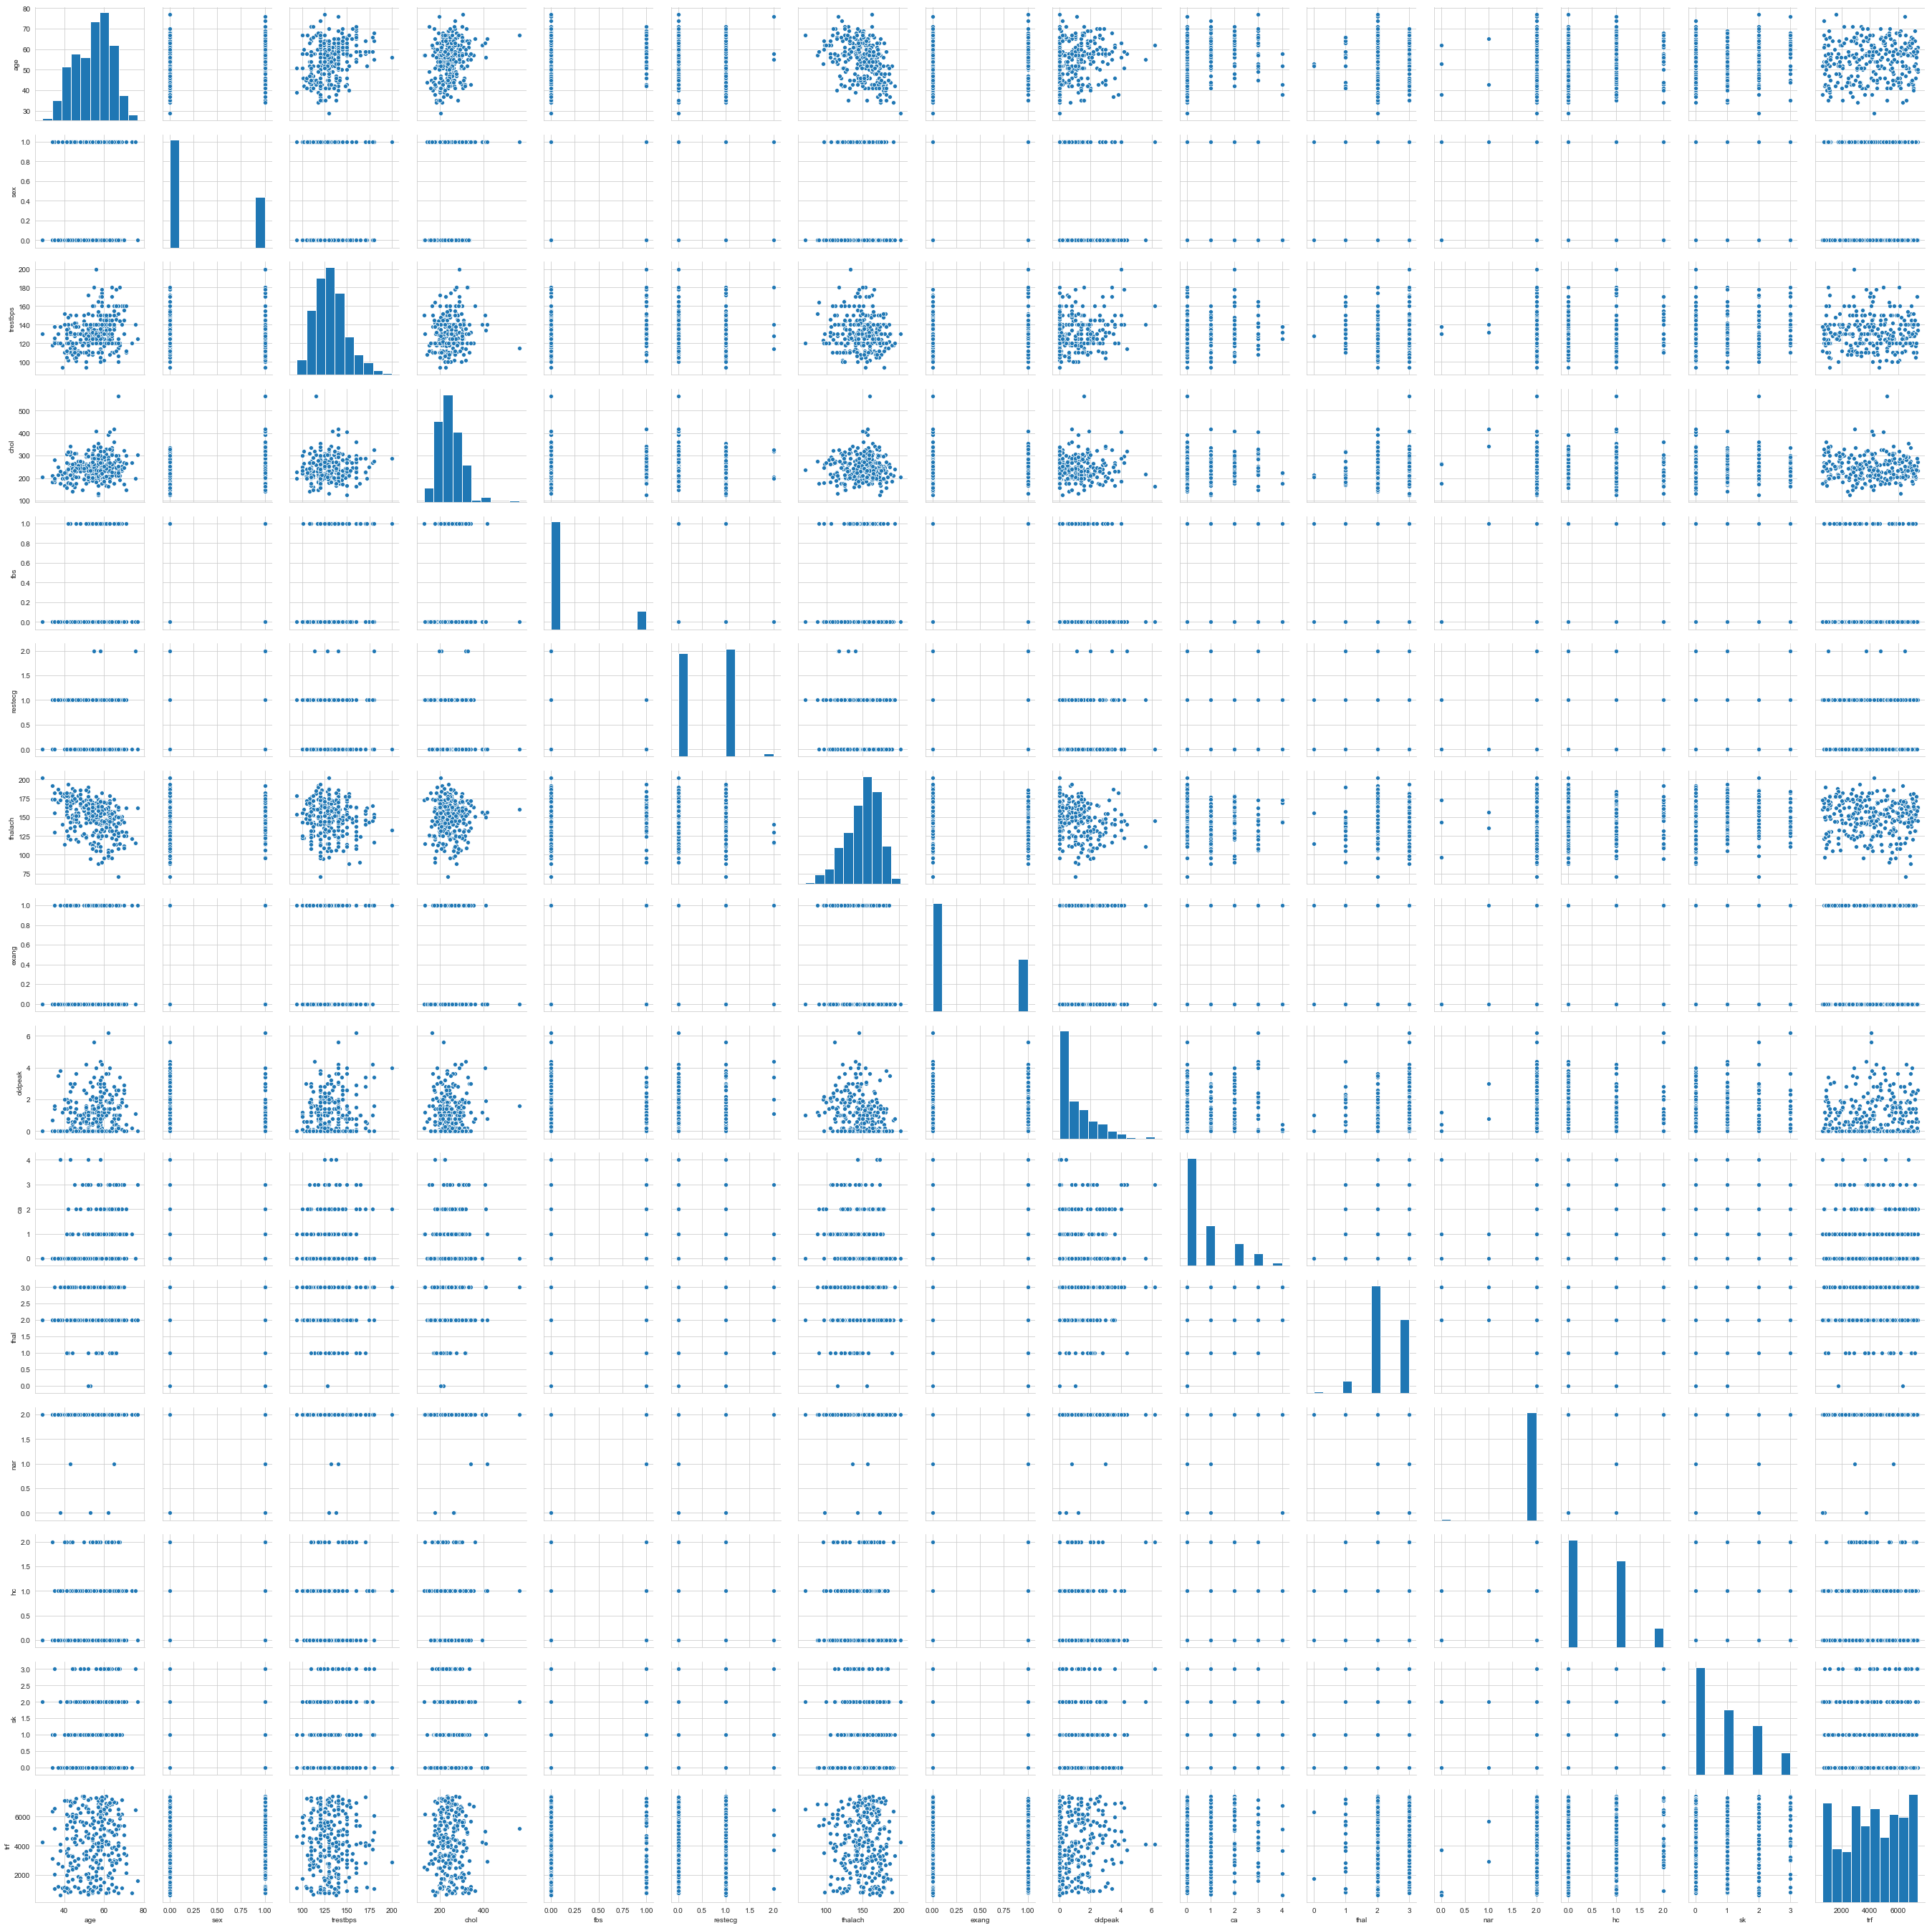

In [201]:
sns.pairplot(dados1)

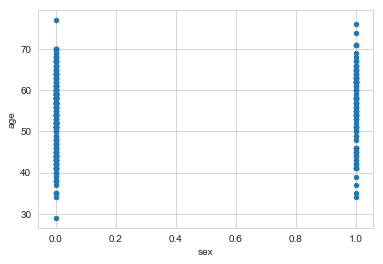

In [202]:
# Scatter plot sex x age)
dados1.plot(kind="scatter", x="sex", y="age")

#sns.catplot(x="day", y="total_bill", kind="box", data=tips);

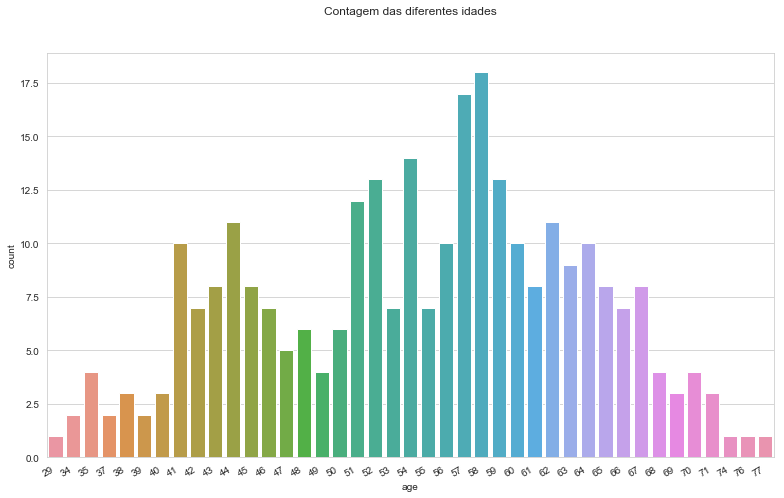

In [203]:
#sns.countplot(dados1['age']).set_title("Age")
#plt.tight_layout()
 
plt.figure(figsize=(11,7))
plt.title("Contagem das diferentes idades", y=1.08)
ax = sns.countplot(x='age',data=dados1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.show()


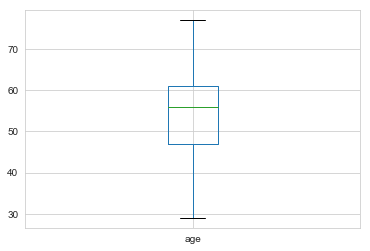

In [204]:
# Boxplot de age
age_boxplot = dados1.boxplot(column=['age'])

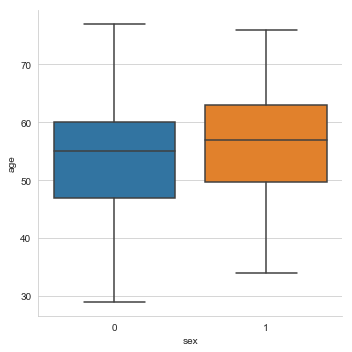

In [205]:
sns.catplot(x="sex", y="age", kind="box", data=dados1);

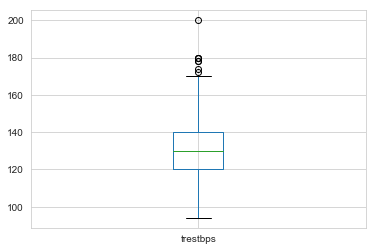

In [206]:
# Boxplot de trestbps
trestbps_boxplot = dados1.boxplot(column=['trestbps'])

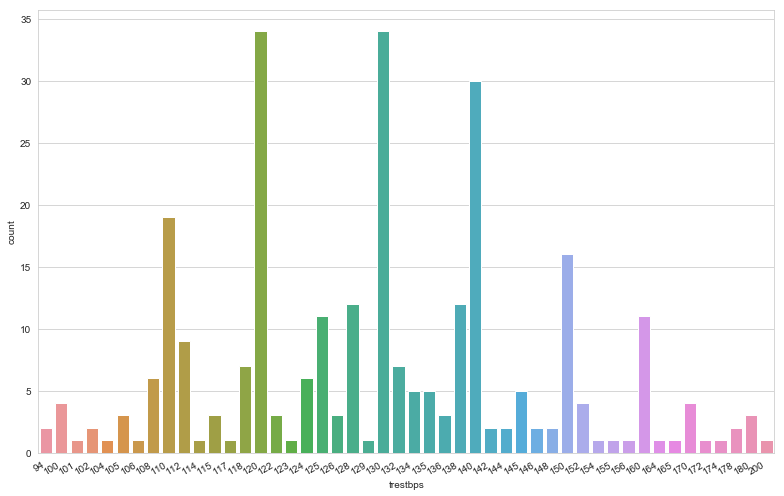

In [207]:
plt.figure(figsize=(11,7))
ax = sns.countplot(x='trestbps',data=dados1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.show()

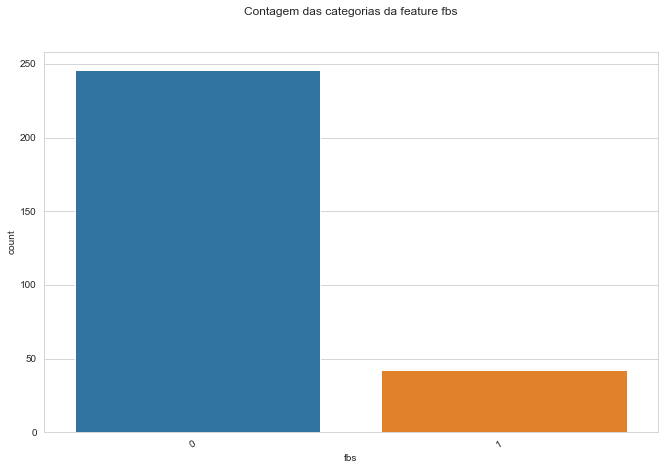

In [208]:
plt.figure(figsize=(11,7))
plt.title("Contagem das categorias da feature fbs", y=1.08)
ax = sns.countplot(x='fbs',data=dados1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
#plt.tight_layout()
plt.show()

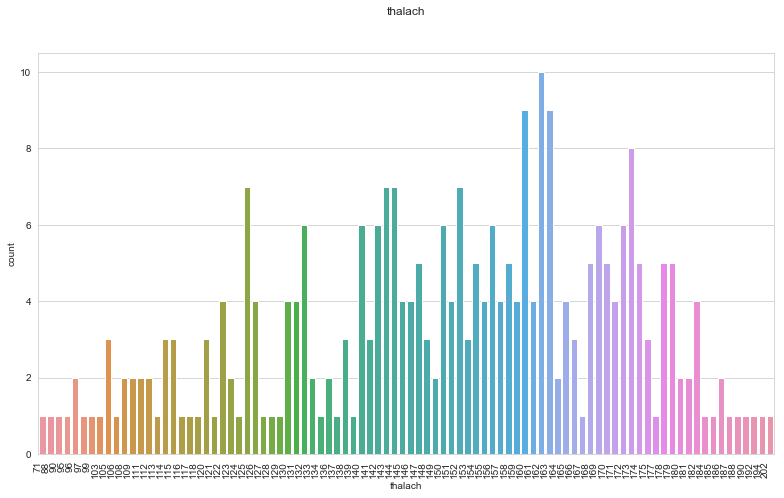

In [209]:
plt.figure(figsize=(11,7))
plt.title("thalach", y=1.08)
ax = sns.countplot(x='thalach',data=dados1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

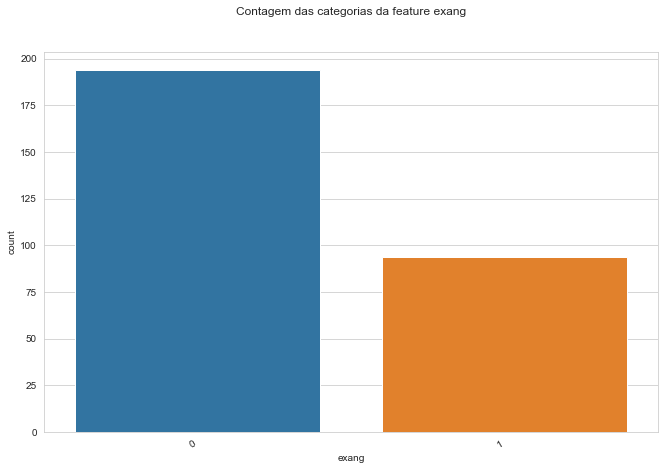

In [210]:
plt.figure(figsize=(11,7))
plt.title("Contagem das categorias da feature exang", y=1.08)
ax = sns.countplot(x='exang',data=dados1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
#plt.tight_layout()
plt.show()

In [211]:
# Fazer histograma de oldpeak

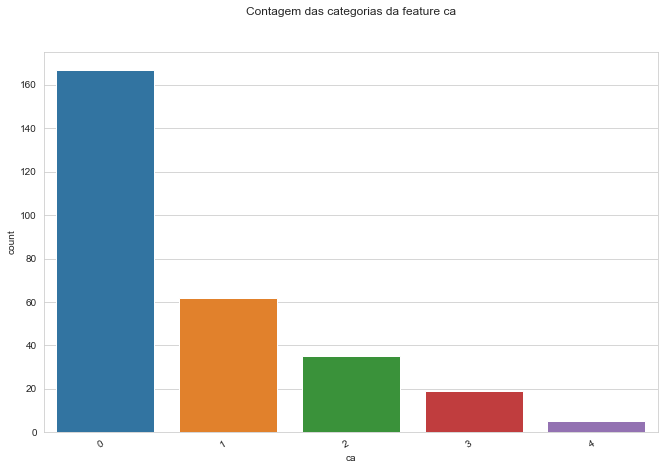

In [212]:
plt.figure(figsize=(11,7))
plt.title("Contagem das categorias da feature ca", y=1.08)
ax = sns.countplot(x='ca',data=dados1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
#plt.tight_layout()
plt.show()

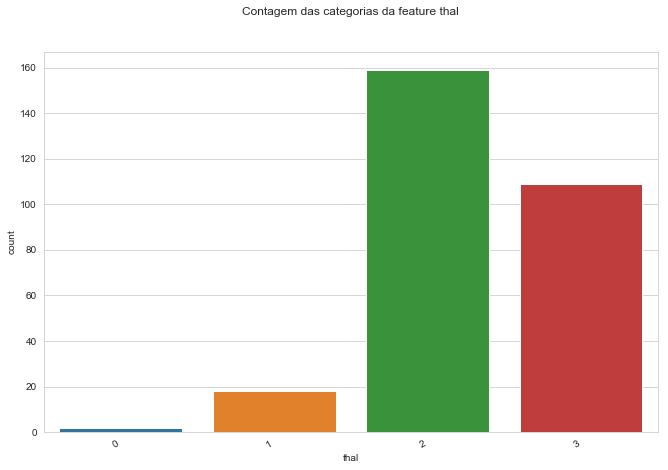

In [213]:
plt.figure(figsize=(11,7))
plt.title("Contagem das categorias da feature thal", y=1.08)
ax = sns.countplot(x='thal',data=dados1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
#plt.tight_layout()
plt.show()

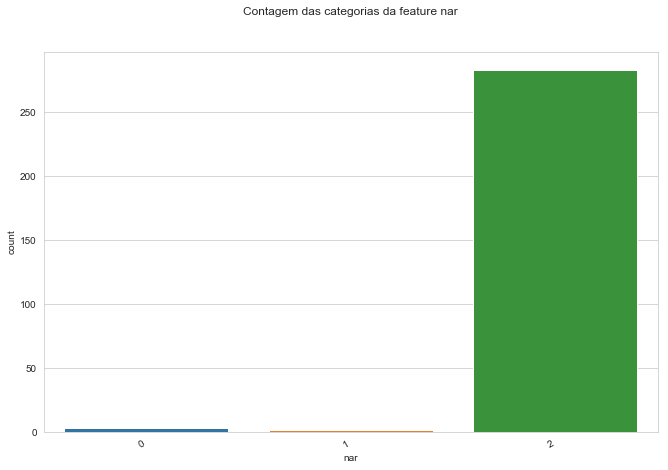

In [214]:
plt.figure(figsize=(11,7))
plt.title("Contagem das categorias da feature nar", y=1.08)
ax = sns.countplot(x='nar',data=dados1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
#plt.tight_layout()
plt.show()

In [ ]:
# Verifica-se que a feature nar assume praticamente somente valores correspondes à classe 2 no dataset fornecido.
# as ocorrências de outros valores são muito poucas, ao menos no dataset fornecido.
# como não tenho infomração se esse é um padrão representativo dessa feature, a mesma será mantida, a princípio 
# para treinamento do Random Forest

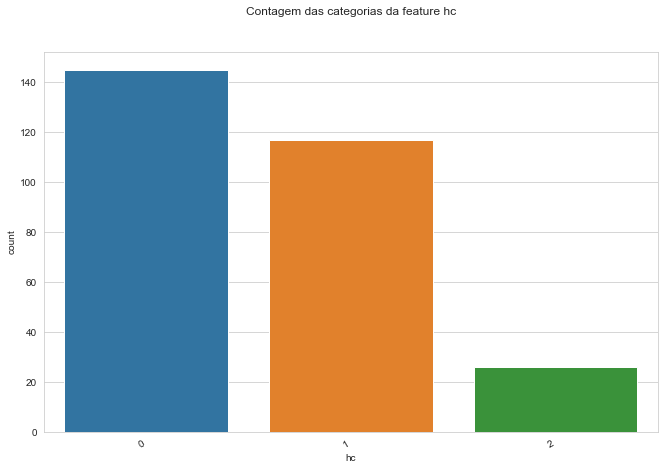

In [328]:
plt.figure(figsize=(11,7))
plt.title("Contagem das categorias da feature hc", y=1.08)
ax = sns.countplot(x='hc',data=dados1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
#plt.tight_layout()
plt.show()

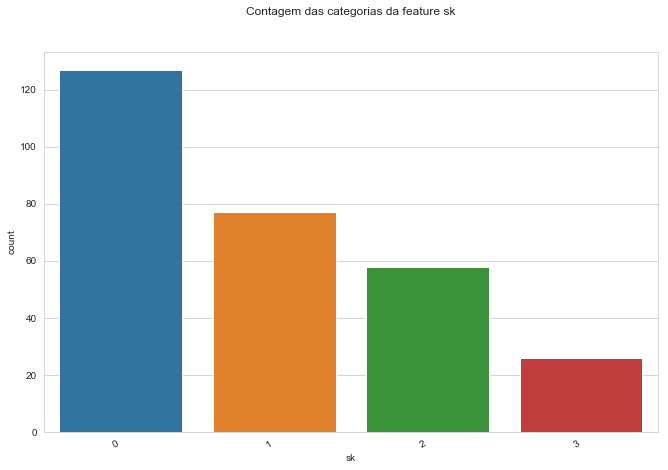

In [329]:
plt.figure(figsize=(11,7))
plt.title("Contagem das categorias da feature sk", y=1.08)
ax = sns.countplot(x='sk',data=dados1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
#plt.tight_layout()
plt.show()

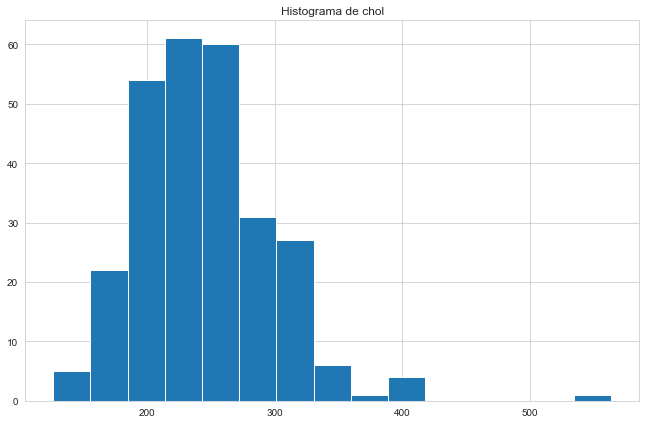

In [330]:
plt.figure(figsize=(11,7))
plt.title("Histograma de chol")
hist = dados1['chol'].hist(bins=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
#plt.tight_layout()
plt.show()

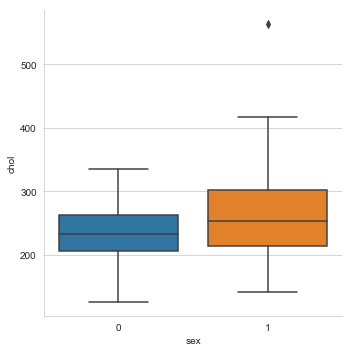

In [331]:
sns.catplot(x="sex", y="chol", kind="box", data=dados1);

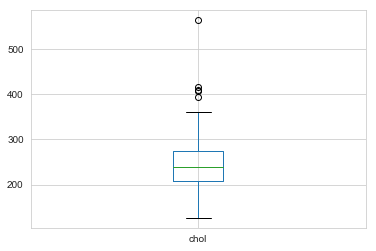

In [332]:
# Boxplot de chol
chol_boxplot = dados.boxplot(column=['chol'])

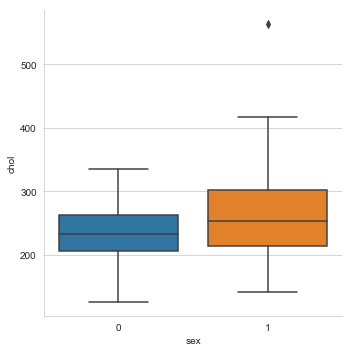

In [333]:
sns.catplot(x="sex", y="chol", kind="box", data=dados1);

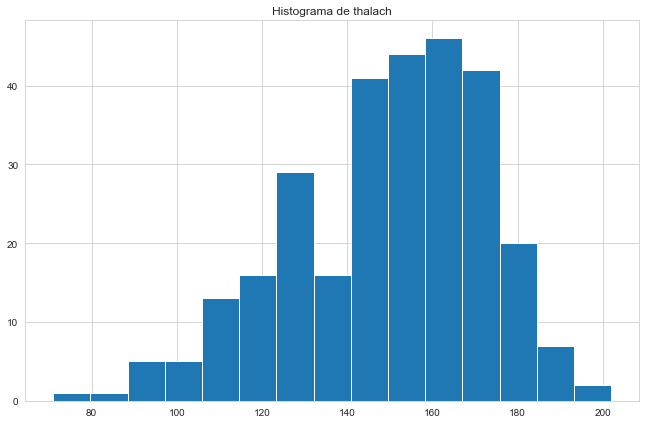

In [334]:
plt.figure(figsize=(11,7))
plt.title("Histograma de thalach")
hist = dados1['thalach'].hist(bins=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
#plt.tight_layout()
plt.show()

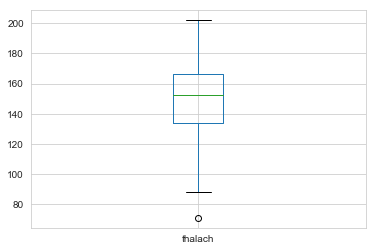

In [335]:
# Boxplot de thalach
thalach_boxplot = dados.boxplot(column=['thalach'])

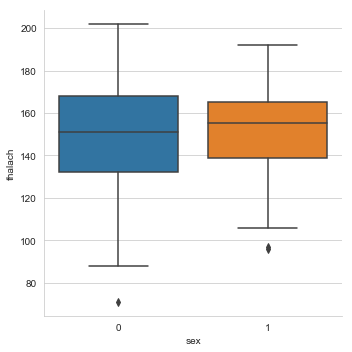

In [336]:
sns.catplot(x="sex", y="thalach", kind="box", data=dados1);

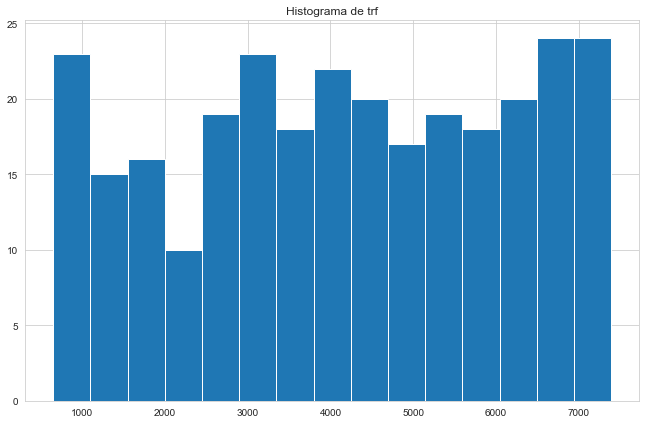

In [337]:
#trf = dados1["trf"]
#plt.hist(trf)
#plt.title("Histograma de trf")
#plt.xlabel("Value")
#plt.ylabel("Frequency")

#fig = plt.gcf()
#plotly_fig = tls.mpl_to_plotly( fig )
#py.iplot(plotly_fig, filename='mpl-basic-histogram')



plt.figure(figsize=(11,7))
plt.title("Histograma de trf")
hist = dados1['trf'].hist(bins=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
#plt.tight_layout()
plt.show()

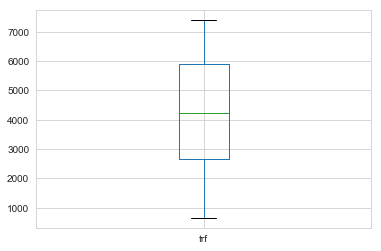

In [338]:
# Boxplot de trfh
trf_boxplot = dados.boxplot(column=['trf'])

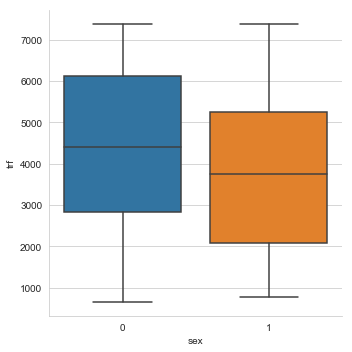

In [339]:
sns.catplot(x="sex", y="trf", kind="box", data=dados1);

In [340]:
# COmentários:
# Verifica-se indícios de outliers nas features trestbps, chol e thalach
# a eliminação destes outliers será feita mais abaixo após outros procedimentos (como a divis]ão do conjunto 
# em train e test sets, para se evitar data leakage)

In [228]:
# divisão do dataset em train e test

In [229]:
# Separando os conjuntos y e X

y=dados1['sex']
X = dados1.drop('sex', axis = 1)

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# 20% para conj de teste
# random_state fixado em 0 para assegurar reproducibilidade dos resultados

In [231]:
X_train.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
46,57,140,192.0,0,1,148,0,0.4,0,1,2,1,1,2512.103333
258,64,130,303.0,0,1,122,0,2.0,2,2,2,2,2,2692.431529
215,54,132,288.0,1,0,159,1,0.0,1,2,2,0,2,1875.396493
168,41,126,306.0,0,1,163,0,0.0,0,2,2,0,1,5389.339507
224,51,140,308.0,0,0,142,0,1.5,1,2,2,1,1,2065.822441


In [232]:
X_train.shape

(230, 14)

In [233]:
y_train.shape

(230,)

In [234]:
X_test.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
55,45,112,160.0,0,1,138,0,0.0,0,2,2,1,0,2987.743277
182,51,140,261.0,0,0,186,1,0.0,0,2,2,0,1,5009.414020
92,66,160,228.0,0,0,138,0,2.3,0,1,2,0,1,6927.494202
208,53,140,203.0,1,0,155,1,3.1,0,3,2,0,1,1461.568956
278,70,145,174.0,0,1,125,1,2.6,0,3,2,0,2,4736.125353


In [235]:
X_test.shape

(58, 14)

In [236]:
X_test.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
55,45,112,160.0,0,1,138,0,0.0,0,2,2,1,0,2987.743277
182,51,140,261.0,0,0,186,1,0.0,0,2,2,0,1,5009.414020
92,66,160,228.0,0,0,138,0,2.3,0,1,2,0,1,6927.494202
208,53,140,203.0,1,0,155,1,3.1,0,3,2,0,1,1461.568956
278,70,145,174.0,0,1,125,1,2.6,0,3,2,0,2,4736.125353


In [237]:
y_test.shape

(58,)

In [238]:
y_test.head()

55     1
182    0
92     0
208    0
278    0
Name: sex, dtype: int32

In [239]:
# Reunindo os conjuntos X e y, no test e train para eliminar outliers

#X_tudo_test = X_test_scaled.join(X_test_encoded)
train = X_train.join(y_train)
train

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf,sex
46,57,140,192.0,0,1,148,0,0.4,0,1,2,1,1,2512.103333,0
258,64,130,303.0,0,1,122,0,2.0,2,2,2,2,2,2692.431529,1
215,54,132,288.0,1,0,159,1,0.0,1,2,2,0,2,1875.396493,1
168,41,126,306.0,0,1,163,0,0.0,0,2,2,0,1,5389.339507,1
224,51,140,308.0,0,0,142,0,1.5,1,2,2,1,1,2065.822441,1
190,53,138,234.0,0,0,160,0,0.0,0,2,2,1,1,1010.390582,1
27,60,125,258.0,0,0,141,1,2.8,1,3,2,1,1,4700.225585,0
135,63,124,197.0,0,1,136,1,0.0,0,2,2,1,3,5041.366216,1
246,51,110,175.0,0,1,123,0,0.6,0,2,2,1,2,3109.538262,0
37,51,94,227.0,0,1,154,1,0.0,1,3,2,0,1,4655.909979,0


In [240]:
train.shape

(230, 15)

In [241]:
test = X_test.join(y_test)
test.shape

(58, 15)

In [242]:
# Retirando missing values de chol
#df = df.dropna(axis=0, subset=['Charge_Per_Line'])
train = train.dropna(axis=0, subset=['chol'])

In [243]:
train.shape

(217, 15)

In [244]:
test = test.dropna(axis=0, subset=['chol'])
test.shape

(55, 15)

In [245]:
# eliminação e outliers das features nos conjs de train e test separadamente
# para evitar data leakage
# Afunção definida abaixo irá considerar como outlier todo valor, de cada feature 
# Que se encontrar acima ou abaixo de 2.0 intervalos interquartis, da distribuição empírica dessas variáveis.
# Esse é um critério razoavelmente conservador na iodentificação e eliminação de outliers.

In [246]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-2.0*iqr
    fence_high = q3+2.0*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [247]:
train1 = remove_outlier(train, 'trestbps')
train1.shape

(213, 15)

In [248]:
train2 = remove_outlier(train1, 'chol')
train2.shape

(209, 15)

In [249]:
train3 = remove_outlier(train2, 'thalach')
train3.shape


(209, 15)

In [250]:
train4 = remove_outlier(train3, 'oldpeak')
train4.shape

(207, 15)

In [251]:
train5 = remove_outlier(train4, 'trf')
train5.shape

(207, 15)

In [252]:
test1 = remove_outlier(test, 'trestbps')
test1.shape

(55, 15)

In [253]:
test2 = remove_outlier(test1, 'chol')
test2.shape

(55, 15)

In [254]:
test3 = remove_outlier(test2, 'thalach')
test3.shape

(55, 15)

In [255]:
test4 = remove_outlier(test3, 'oldpeak')
test4.shape

(55, 15)

In [256]:
test5 = remove_outlier(test4, 'trf')
test5.shape

(55, 15)

In [ ]:
# Comentários:
# como se pôde verufucar nas células acima, não se perdeu muitas observações com a aplicação do critério de 
# eliminação de outliers adotado.

In [341]:
train5.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf,sex
46,57,140,192.0,0,1,148,0,0.4,0,1,2,1,1,2512.103333,0
258,64,130,303.0,0,1,122,0,2.0,2,2,2,2,2,2692.431529,1
215,54,132,288.0,1,0,159,1,0.0,1,2,2,0,2,1875.396493,1
168,41,126,306.0,0,1,163,0,0.0,0,2,2,0,1,5389.339507,1
224,51,140,308.0,0,0,142,0,1.5,1,2,2,1,1,2065.822441,1


In [342]:
test5.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf,sex
55,45,112,160.0,0,1,138,0,0.0,0,2,2,1,0,2987.743277,1
182,51,140,261.0,0,0,186,1,0.0,0,2,2,0,1,5009.414020,0
92,66,160,228.0,0,0,138,0,2.3,0,1,2,0,1,6927.494202,0
208,53,140,203.0,1,0,155,1,3.1,0,3,2,0,1,1461.568956,0
278,70,145,174.0,0,1,125,1,2.6,0,3,2,0,2,4736.125353,0


In [259]:
# Checando as classes de sex nos conjuntos de teste e train após essa etapa:

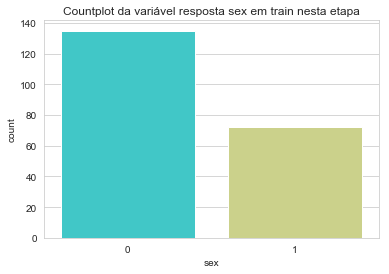

In [260]:
# Gráfico de contagem da variável-resposta sex em train até essa etapa (após eliminação de outliers)

sns.set_style('whitegrid')
sns.countplot(x='sex',data=train5,palette='rainbow').set_title('Countplot da variável resposta sex em train nesta etapa')
plt.show()

In [261]:
train5.groupby('sex')['sex'].count()

sex
0    135
1     72
Name: sex, dtype: int64

In [ ]:
# COmnentário: a eliminação de outliers não amenizou significativamente o desbalanceamento de classes na variável-resposta

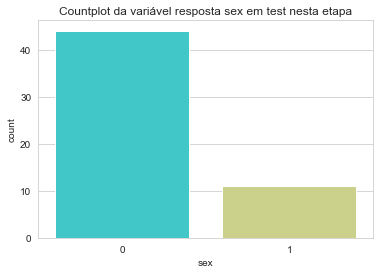

In [262]:
# Gráfico de contagem da variável-resposta sex em test até essa etapa

sns.set_style('whitegrid')
sns.countplot(x='sex',data=test5,palette='rainbow').set_title('Countplot da variável resposta sex em test nesta etapa')
plt.show()

In [263]:
test5.groupby('sex')['sex'].count()

sex
0    44
1    11
Name: sex, dtype: int64

In [264]:
y_train=train5['sex']
X_train = train5.drop('sex', axis = 1)

In [265]:
y_test=test5['sex']
X_test = test5.drop('sex', axis = 1)

In [ ]:
# Critérios para abordagem do desbalanceamento de classes

In [343]:
# resampling para balancear as classes da variável-resposta sex, nos conjuntos de train e test:

# O método de reamostragem utilizado será o método de super amstragem da classe minoritária (homens)
#com o algortimo SMOTE-NC. Este algoritmo de oversampling é considerado por alguns experts e alguns pesquisadorees na academia
# como o melhor algoritmo para oversampling de classes minoritárias, com features contínuas e 
# categóricas; sendo melhor do que a estraégia de resampling naive, que tende a levar a overfitting do modelo. 

# não irei proceder a um método de sub amostragem das observações com a classe majoritária da varipavel-resposta posi temos muito 
# poucas observações no dataset

# COmo só há duas classes na variável-resposta, não há possibilidade de fusão de classes pouco fequentes 
# com classes mais frequentes

# Poderia-se também adotar estratégias de ponderação das classes, atribuindo-se maior peso À classes minoritárias.
# ou mesmo combinando-se critérios de oversampling com subsampling e ponderação de classes.

# COntudo aqui se utilzou o algoritmo SMOTE-NC que tem fornecido, na minha experiência com classes desbalanceadasd e datasets pequenos/ limitados
# o melhor resultado

In [267]:
# Usando o algoritmo SMOTE-NC de resampling (oversamplig) no conjunto de train
sm = SMOTENC(categorical_features= [3,4,6,8,9,10,11,12],random_state=0, k_neighbors=3)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [268]:
X_train_res

array([[5.70e+01, 1.40e+02, 1.92e+02, ..., 1.00e+00, 1.00e+00, 2.51e+03],
       [6.40e+01, 1.30e+02, 3.03e+02, ..., 2.00e+00, 2.00e+00, 2.69e+03],
       [5.40e+01, 1.32e+02, 2.88e+02, ..., 0.00e+00, 2.00e+00, 1.88e+03],
       ...,
       [5.17e+01, 1.11e+02, 2.05e+02, ..., 1.00e+00, 0.00e+00, 1.10e+03],
       [4.40e+01, 1.27e+02, 2.08e+02, ..., 1.00e+00, 1.00e+00, 2.34e+03],
       [5.34e+01, 1.18e+02, 2.32e+02, ..., 1.00e+00, 0.00e+00, 3.36e+03]])

In [269]:
X_train_res.shape

(270, 14)

In [270]:
X_train_res_final = pd.DataFrame(X_train_res,columns=X_train.columns)

In [271]:
X_train_res_final

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
0,57.000000,140.000000,192.000000,0.0,1.0,148.000000,0.0,0.400000,0.0,1.0,2.0,1.0,1.0,2512.103333
1,64.000000,130.000000,303.000000,0.0,1.0,122.000000,0.0,2.000000,2.0,2.0,2.0,2.0,2.0,2692.431529
2,54.000000,132.000000,288.000000,1.0,0.0,159.000000,1.0,0.000000,1.0,2.0,2.0,0.0,2.0,1875.396493
3,41.000000,126.000000,306.000000,0.0,1.0,163.000000,0.0,0.000000,0.0,2.0,2.0,0.0,1.0,5389.339507
4,51.000000,140.000000,308.000000,0.0,0.0,142.000000,0.0,1.500000,1.0,2.0,2.0,1.0,1.0,2065.822441
5,53.000000,138.000000,234.000000,0.0,0.0,160.000000,0.0,0.000000,0.0,2.0,2.0,1.0,1.0,1010.390582
6,60.000000,125.000000,258.000000,0.0,0.0,141.000000,1.0,2.800000,1.0,3.0,2.0,1.0,1.0,4700.225585
7,63.000000,124.000000,197.000000,0.0,1.0,136.000000,1.0,0.000000,0.0,2.0,2.0,1.0,3.0,5041.366216
8,51.000000,110.000000,175.000000,0.0,1.0,123.000000,0.0,0.600000,0.0,2.0,2.0,1.0,2.0,3109.538262
9,51.000000,94.000000,227.000000,0.0,1.0,154.000000,1.0,0.000000,1.0,3.0,2.0,0.0,1.0,4655.909979


In [272]:
# Usando o algoritmo SMOTE-NC de resampling conjunto de teste
sm = SMOTENC(categorical_features= [3,4,6,8,9,10,11,12],random_state=0, k_neighbors=3)
X_test_res, y_test_res = sm.fit_resample(X_test, y_test)

In [273]:
X_test_res

array([[4.50e+01, 1.12e+02, 1.60e+02, ..., 1.00e+00, 0.00e+00, 2.99e+03],
       [5.10e+01, 1.40e+02, 2.61e+02, ..., 0.00e+00, 1.00e+00, 5.01e+03],
       [6.60e+01, 1.60e+02, 2.28e+02, ..., 0.00e+00, 1.00e+00, 6.93e+03],
       ...,
       [5.59e+01, 1.32e+02, 2.19e+02, ..., 1.00e+00, 0.00e+00, 2.64e+03],
       [4.46e+01, 1.10e+02, 1.52e+02, ..., 1.00e+00, 2.00e+00, 2.75e+03],
       [4.41e+01, 1.04e+02, 2.33e+02, ..., 0.00e+00, 0.00e+00, 6.69e+03]])

In [274]:
X_test_res.shape

(88, 14)

In [275]:
X_test_res_final = pd.DataFrame(X_test_res,columns=X_test.columns)

In [276]:
X_test_res_final

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
0,45.000000,112.000000,160.000000,0.0,1.0,138.000000,0.0,0.000000,0.0,2.0,2.0,1.0,0.0,2987.743277
1,51.000000,140.000000,261.000000,0.0,0.0,186.000000,1.0,0.000000,0.0,2.0,2.0,0.0,1.0,5009.414020
2,66.000000,160.000000,228.000000,0.0,0.0,138.000000,0.0,2.300000,0.0,1.0,2.0,0.0,1.0,6927.494202
3,53.000000,140.000000,203.000000,1.0,0.0,155.000000,1.0,3.100000,0.0,3.0,2.0,0.0,1.0,1461.568956
4,70.000000,145.000000,174.000000,0.0,1.0,125.000000,1.0,2.600000,0.0,3.0,2.0,0.0,2.0,4736.125353
5,54.000000,135.000000,304.000000,1.0,1.0,170.000000,0.0,0.000000,0.0,2.0,2.0,1.0,1.0,763.348099
6,44.000000,108.000000,141.000000,0.0,1.0,175.000000,0.0,0.600000,0.0,2.0,2.0,1.0,1.0,2417.404523
7,51.000000,125.000000,245.000000,1.0,0.0,166.000000,0.0,2.400000,0.0,2.0,2.0,0.0,2.0,5559.232013
8,59.000000,140.000000,177.000000,0.0,1.0,162.000000,1.0,0.000000,1.0,3.0,2.0,0.0,1.0,6120.306920
9,57.000000,150.000000,126.000000,1.0,1.0,173.000000,0.0,0.200000,1.0,3.0,2.0,1.0,2.0,2566.595199


In [277]:
X_train_res_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age         270 non-null float64
trestbps    270 non-null float64
chol        270 non-null float64
fbs         270 non-null float64
restecg     270 non-null float64
thalach     270 non-null float64
exang       270 non-null float64
oldpeak     270 non-null float64
ca          270 non-null float64
thal        270 non-null float64
nar         270 non-null float64
hc          270 non-null float64
sk          270 non-null float64
trf         270 non-null float64
dtypes: float64(14)
memory usage: 29.6 KB


In [278]:
X_test_res_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 14 columns):
age         88 non-null float64
trestbps    88 non-null float64
chol        88 non-null float64
fbs         88 non-null float64
restecg     88 non-null float64
thalach     88 non-null float64
exang       88 non-null float64
oldpeak     88 non-null float64
ca          88 non-null float64
thal        88 non-null float64
nar         88 non-null float64
hc          88 non-null float64
sk          88 non-null float64
trf         88 non-null float64
dtypes: float64(14)
memory usage: 9.7 KB


In [279]:
#y_test_res_final = pd.DataFrame(y_test_res)
#,columns=y_test.columns
#y_test_res_final



y_coluna = ['sex']
y_train_res_final = pd.DataFrame(y_train_res,columns=y_coluna)
y_train_res_final.head()

,sex
0,0
1,1
2,1
3,1
4,1


In [280]:
y_coluna = ['sex']
y_test_res_final = pd.DataFrame(y_test_res,columns=y_coluna)
y_test_res_final.head()

,sex
0,1
1,0
2,0
3,0
4,0


In [281]:
# plotagem das categorias de sex nos conjuntos de train e test após resampling:

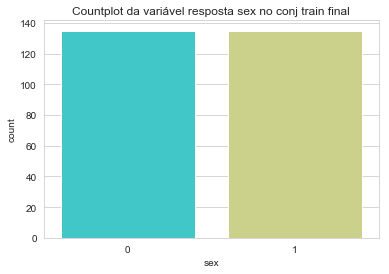

In [282]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=y_train_res_final,palette='rainbow').set_title('Countplot da variável resposta sex no conj train final')
plt.show()

In [283]:
y_train_res_final.groupby('sex')['sex'].count()

sex
0    135
1    135
Name: sex, dtype: int64

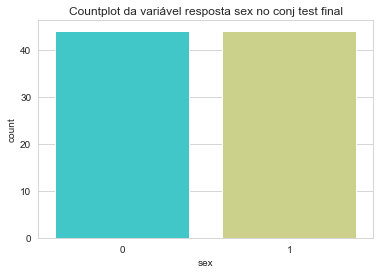

In [284]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=y_test_res_final,palette='rainbow').set_title('Countplot da variável resposta sex no conj test final')
plt.show()

In [285]:
y_test_res_final.groupby('sex')['sex'].count()

sex
0    44
1    44
Name: sex, dtype: int64

In [286]:
# Mudando dos tipos das variáveis para int, nos conjuntos finais:

#df['column'] = df['column'].astype('str') 
dados1['trestbps'] = dados1['age'].astype('int') 

In [287]:
X_train_res_final['age'] = X_train_res_final['age'].astype('int')

In [288]:
X_train_res_final['trestbps'] = X_train_res_final['trestbps'].astype('int')

In [289]:
X_train_res_final['fbs'] = X_train_res_final['fbs'].astype('int')

In [290]:
X_train_res_final['restecg'] = X_train_res_final['restecg'].astype('int')

In [291]:
X_train_res_final['thalach'] = X_train_res_final['thalach'].astype('int')

In [292]:
X_train_res_final['exang'] = X_train_res_final['exang'].astype('int')

In [293]:
X_train_res_final['ca'] = X_train_res_final['ca'].astype('int')

In [294]:
X_train_res_final['thal'] = X_train_res_final['thal'].astype('int')

In [295]:
X_train_res_final['nar'] = X_train_res_final['nar'].astype('int')

In [296]:
X_train_res_final['hc'] = X_train_res_final['hc'].astype('int')

In [297]:
X_train_res_final['sk'] = X_train_res_final['sk'].astype('int')

In [298]:
X_train_res_final.count()

age         270
trestbps    270
chol        270
fbs         270
restecg     270
thalach     270
exang       270
oldpeak     270
ca          270
thal        270
nar         270
hc          270
sk          270
trf         270
dtype: int64

In [299]:
X_train_res_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age         270 non-null int32
trestbps    270 non-null int32
chol        270 non-null float64
fbs         270 non-null int32
restecg     270 non-null int32
thalach     270 non-null int32
exang       270 non-null int32
oldpeak     270 non-null float64
ca          270 non-null int32
thal        270 non-null int32
nar         270 non-null int32
hc          270 non-null int32
sk          270 non-null int32
trf         270 non-null float64
dtypes: float64(3), int32(11)
memory usage: 18.0 KB


In [300]:
X_test_res_final['age'] = X_test_res_final['age'].astype('int')
X_test_res_final['trestbps'] = X_test_res_final['trestbps'].astype('int')
X_test_res_final['fbs'] = X_test_res_final['fbs'].astype('int')
X_test_res_final['restecg'] = X_test_res_final['restecg'].astype('int')
X_test_res_final['thalach'] = X_test_res_final['thalach'].astype('int')
X_test_res_final['exang'] = X_test_res_final['exang'].astype('int')
X_test_res_final['ca'] = X_test_res_final['ca'].astype('int')
X_test_res_final['thal'] = X_test_res_final['thal'].astype('int')
X_test_res_final['nar'] = X_test_res_final['nar'].astype('int')
X_test_res_final['hc'] = X_test_res_final['hc'].astype('int')
X_test_res_final['sk'] = X_test_res_final['sk'].astype('int')


In [359]:
X_test_res_final.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
0,45,112,160.0,0,1,138,0,0.0,0,2,2,1,0,2987.743277
1,51,140,261.0,0,0,186,1,0.0,0,2,2,0,1,5009.414020
2,66,160,228.0,0,0,138,0,2.3,0,1,2,0,1,6927.494202
3,53,140,203.0,1,0,155,1,3.1,0,3,2,0,1,1461.568956
4,70,145,174.0,0,1,125,1,2.6,0,3,2,0,2,4736.125353


In [302]:
#3 Procurando por correlações entre features no conjunto de Treinamento, após resampling e wrangling

In [303]:
features_for_pairplot = X_train_res_final[['chol', 'trestbps', 'age',
       'thalach', 'oldpeak', 'trf']]

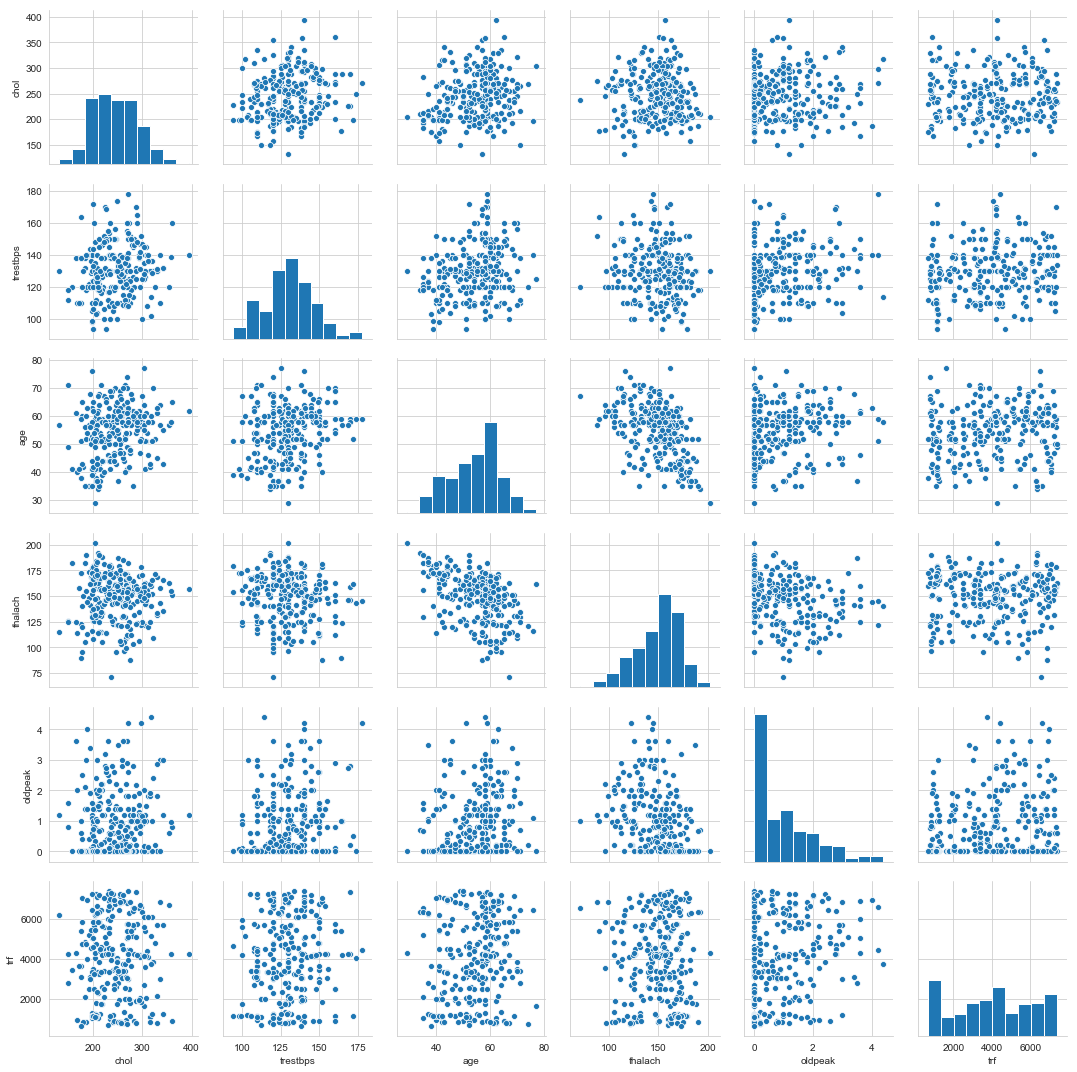

In [304]:
#plt.figure(figsize=(11,7))
sns.pairplot(features_for_pairplot,diag_kind='hist');
#plt.tight_layout()
#plt.plot()

In [305]:
# Coment: Não se encontrou nenhum padrão importante de correlação, linear ou não-linear entre as features n conjunto de treinamento
#
# após o resampling

In [306]:
# Matriz de correlações de Pearson entre features
corr = X_train_res_final.corr()
corr.style.background_gradient()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,thal,nar,hc,sk,trf
age,1,0.223485,0.228344,0.151361,-0.13611,-0.480602,0.123068,0.219933,0.239079,0.0415726,0.0570318,0.0253263,0.122772,0.132414
trestbps,0.223485,1,0.150068,0.1779,-0.154517,-0.118346,0.0580332,0.201418,0.0343587,0.00565998,-0.021239,-0.0397238,0.102696,0.085636
chol,0.228344,0.150068,1,0.0465028,-0.167874,-0.0161144,0.124118,0.0656527,0.0428063,0.0429308,-0.0102095,-0.0424085,0.025732,0.00634951
fbs,0.151361,0.1779,0.0465028,1,-0.0301238,-0.0782567,0.00575645,0.051716,0.193374,-0.0212302,-0.0120194,-0.107266,0.0850487,-0.00890342
restecg,-0.13611,-0.154517,-0.167874,-0.0301238,1,0.0415671,-0.130748,-0.0476927,0.00548249,0.0562789,-0.0137587,0.0350824,0.0757387,-0.0287715
thalach,-0.480602,-0.118346,-0.0161144,-0.0782567,0.0415671,1,-0.335537,-0.340911,-0.188872,-0.113069,0.0624895,-0.047777,0.0297969,-0.00754748
exang,0.123068,0.0580332,0.124118,0.00575645,-0.130748,-0.335537,1,0.329775,0.0697681,0.208247,0.0391611,-0.0250014,0.119457,0.0994547
oldpeak,0.219933,0.201418,0.0656527,0.051716,-0.0476927,-0.340911,0.329775,1,0.236947,0.185656,0.00833181,-0.0233457,0.0225196,0.208924
ca,0.239079,0.0343587,0.0428063,0.193374,0.00548249,-0.188872,0.0697681,0.236947,1,0.157936,-0.107531,-0.119126,0.0466479,0.0681589
thal,0.0415726,0.00565998,0.0429308,-0.0212302,0.0562789,-0.113069,0.208247,0.185656,0.157936,1,-0.0489936,-0.0312314,0.0419802,0.110957


In [307]:
# Não se encontrou nenhum padrão importante de correlação linear entre as features 
# no conjunto de treinamento, após o resampling

In [ ]:
# COmentários sobre a escolha de um classificador baseado em random Forest

In [360]:
# Nesse exercício se optou por se treinar um classificador preditivo do tipo Random Forest (Brieman 2001)
# pelos seguintes motivos:

# 1) São relativamente mais intuitivos e fáceis de se xplicar do que outros classificadores
# 2) envolvem matemática menos complexa par apúblicos menos tpecnicos
# 3) generalizam muito bem e possuem menos tendência a overfitting do que outros modelos preditivos, 
# aja visto que cada claddificador-case (uma árvore de decisão) é treinado com um conjunto de dados ligeiramente difernete um dos outros

# 4) não necessitam de algumas etapas de feature engineering, como feature scaling e OneHotEncoding de features categóricas

# 5) São relativamente conhecidos

# Não dependem da distribuição das features

In [ ]:
# Treinamento de classificadores Random Forest por meio de Grid Search

# A seguir se irá implementar o treinamento de diveros classificadores preditivos RF por meio de Grid Search 
# em conjkuntos de hiperparÂmetros
# o melhor classificador, e, termos de performance de cross validation, será o escolhido como o claddificador final
# na prática, se poderia refinar ainda mais as etapas de escolha do classificador final, 
# com diversas medidas, como:

# 1) Utilizar feature importance e outars medidas para fazer um feature selecton em cima das features inicialmente usadas 
# no Grid Search

# combinar outros métodos de resampling com os utilizados aqui ou
# se utilizar de um método de ponderação de classes.

# Para fins de simplificação desse trabalho, se irá proceder da forma mencionada acima.

In [311]:
# Treinamentos de Random Forests com Grid Search, com sklearn

In [312]:
from sklearn.ensemble import RandomForestClassifier  
classifier = RandomForestClassifier(n_estimators=300, random_state=0) 

In [313]:
grid_param = {  
    'n_estimators': [25, 100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [314]:
# Podemos usar Accuracy como scoring de cross validation no Grid Search pois agora as classes estão balanceadas
gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=4,
                     n_jobs=-1)

In [315]:
gd_sr.fit(X_train_res_final,y_train_res_final.values.ravel())

C:\soft\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=300, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootst

In [ ]:
# save the model to disk

filename = 'finalized_model1.sav'
pickle.dump(gd_sr, open(filename, 'wb'))


In [316]:
# Matriz de confusão e relatório de classificação no conjunto de treinamento, melhor modelo
gd_sr_predictions_train = gd_sr.predict(X_train_res_final)
print(confusion_matrix(y_train_res_final, gd_sr_predictions_train))

[[135   0]
 [  0 135]]


In [317]:
# Relatório de classificação no conjunto de treinamento
print(classification_report(y_train_res_final, gd_sr_predictions_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       135
           1       1.00      1.00      1.00       135

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [318]:
# Melhor escolha de hiperparâmetros:
gd_sr.best_params_


{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 800}

In [319]:
# Melhor estimador baseado nos scores de validação cruzada:
gd_sr.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [320]:
# Avaliação no conjunto de teste

In [321]:
# Matriz de confusão n oconjunto de teste


gd_sr_predictions_test = gd_sr.predict(X_test_res_final)
print(confusion_matrix(y_test_res_final, gd_sr_predictions_test))

[[38  6]
 [17 27]]


In [322]:
# Relatório de classificação no conjunto de teste
print(classification_report(y_test_res_final, gd_sr_predictions_test))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        44
           1       0.82      0.61      0.70        44

    accuracy                           0.74        88
   macro avg       0.75      0.74      0.73        88
weighted avg       0.75      0.74      0.73        88



In [323]:
# Acurácia média do modelo no conjunto de teste com classes rebalanceadas por resampling
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_res_final, gd_sr_predictions_test))

0.7386363636363636


In [324]:
# Matriz de confusão no conjunto de teste antes do resampling


gd_sr_predictions_test_inicial = gd_sr.predict(X_test)
print(confusion_matrix(y_test, gd_sr_predictions_test_inicial))

[[38  6]
 [ 7  4]]


In [325]:
# Relatório de classificação no conjunto de teste antes do resampling
print(classification_report(y_test, gd_sr_predictions_test_inicial))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        44
           1       0.40      0.36      0.38        11

    accuracy                           0.76        55
   macro avg       0.62      0.61      0.62        55
weighted avg       0.76      0.76      0.76        55



In [326]:
# Acurácia média do modelo no conjunto de teste antes do resampling
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, gd_sr_predictions_test_inicial))

0.7636363636363637


In [ ]:
# Feature Importance no melhor classificador de Random Forest obtido no 
# Grid Search

In [358]:
gd_sr.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

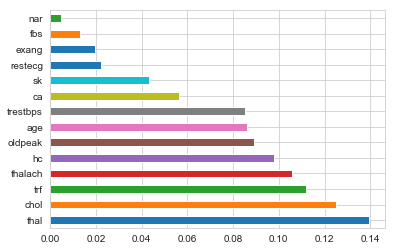

In [361]:
feat_importances = pd.Series(gd_sr.best_estimator_.feature_importances_, index=X_train_res_final.columns)
feat_importances.nlargest(14).plot(kind='barh');

In [ ]:
# COmentários:
#AS features mais importantes (dentre as features que foram
#mantidas para treinamento do modelo), para separação das classes 
#da variável-resposta
# sex, foram: 'thal', 'serum cholesterol' and 'time spent in traffic daily'


# AS features 'sk: patient's skin colour', 'restecg: resting electrocardiographic results',
# 'exang: exercise induced angina' , 'fbs: (fasting blood sugar > 120 mg/dl)' e 'nar: number of arms'
# received the less importance 

# Esses resultados podem auxiliar na seleção de features para 
# uma segunda rodada de treinamento
# (especialmente porque as features são pouco correlacionadas e 
# portanto, não há possibilidade aqui, de features muito corelacionadas
# receberem valores próximos de importance)

# Para fins de somplificação, iremos ificar com o mehor modelo identificado
# na sessão de GridSearch, para fins dewsse exercício.




In [ ]:
# Evaluation with a single decision tree
# Para fins de comparação iremos aqui colocar a performance de 
#uum classificador baseado em uma única árvore de decisão


In [347]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train_res_final,y_train_res_final.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [348]:
# Prediction and Evaluation with the Decision Tree

In [349]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.80      0.84        44
           1       0.44      0.64      0.52        11

    accuracy                           0.76        55
   macro avg       0.67      0.72      0.68        55
weighted avg       0.81      0.76      0.78        55



In [350]:
print(confusion_matrix(y_test,predictions))

[[35  9]
 [ 4  7]]


In [351]:
# Acurácia média do modelo no conjunto de teste antes do resampling
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.7636363636363637


In [ ]:
# Assim, pode-se verificar que a performance no conjunto de teste
# antes do resampling, da árvore de decisão, foi pior do que 
# O do classificador baseado em Árvores de decisão!!!

In [345]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X_train_res_final.columns)
features

['age',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'ca',
 'thal',
 'nar',
 'hc',
 'sk',
 'trf']

In [ ]:
# Plotagem da árvore de decisão com GraphViz

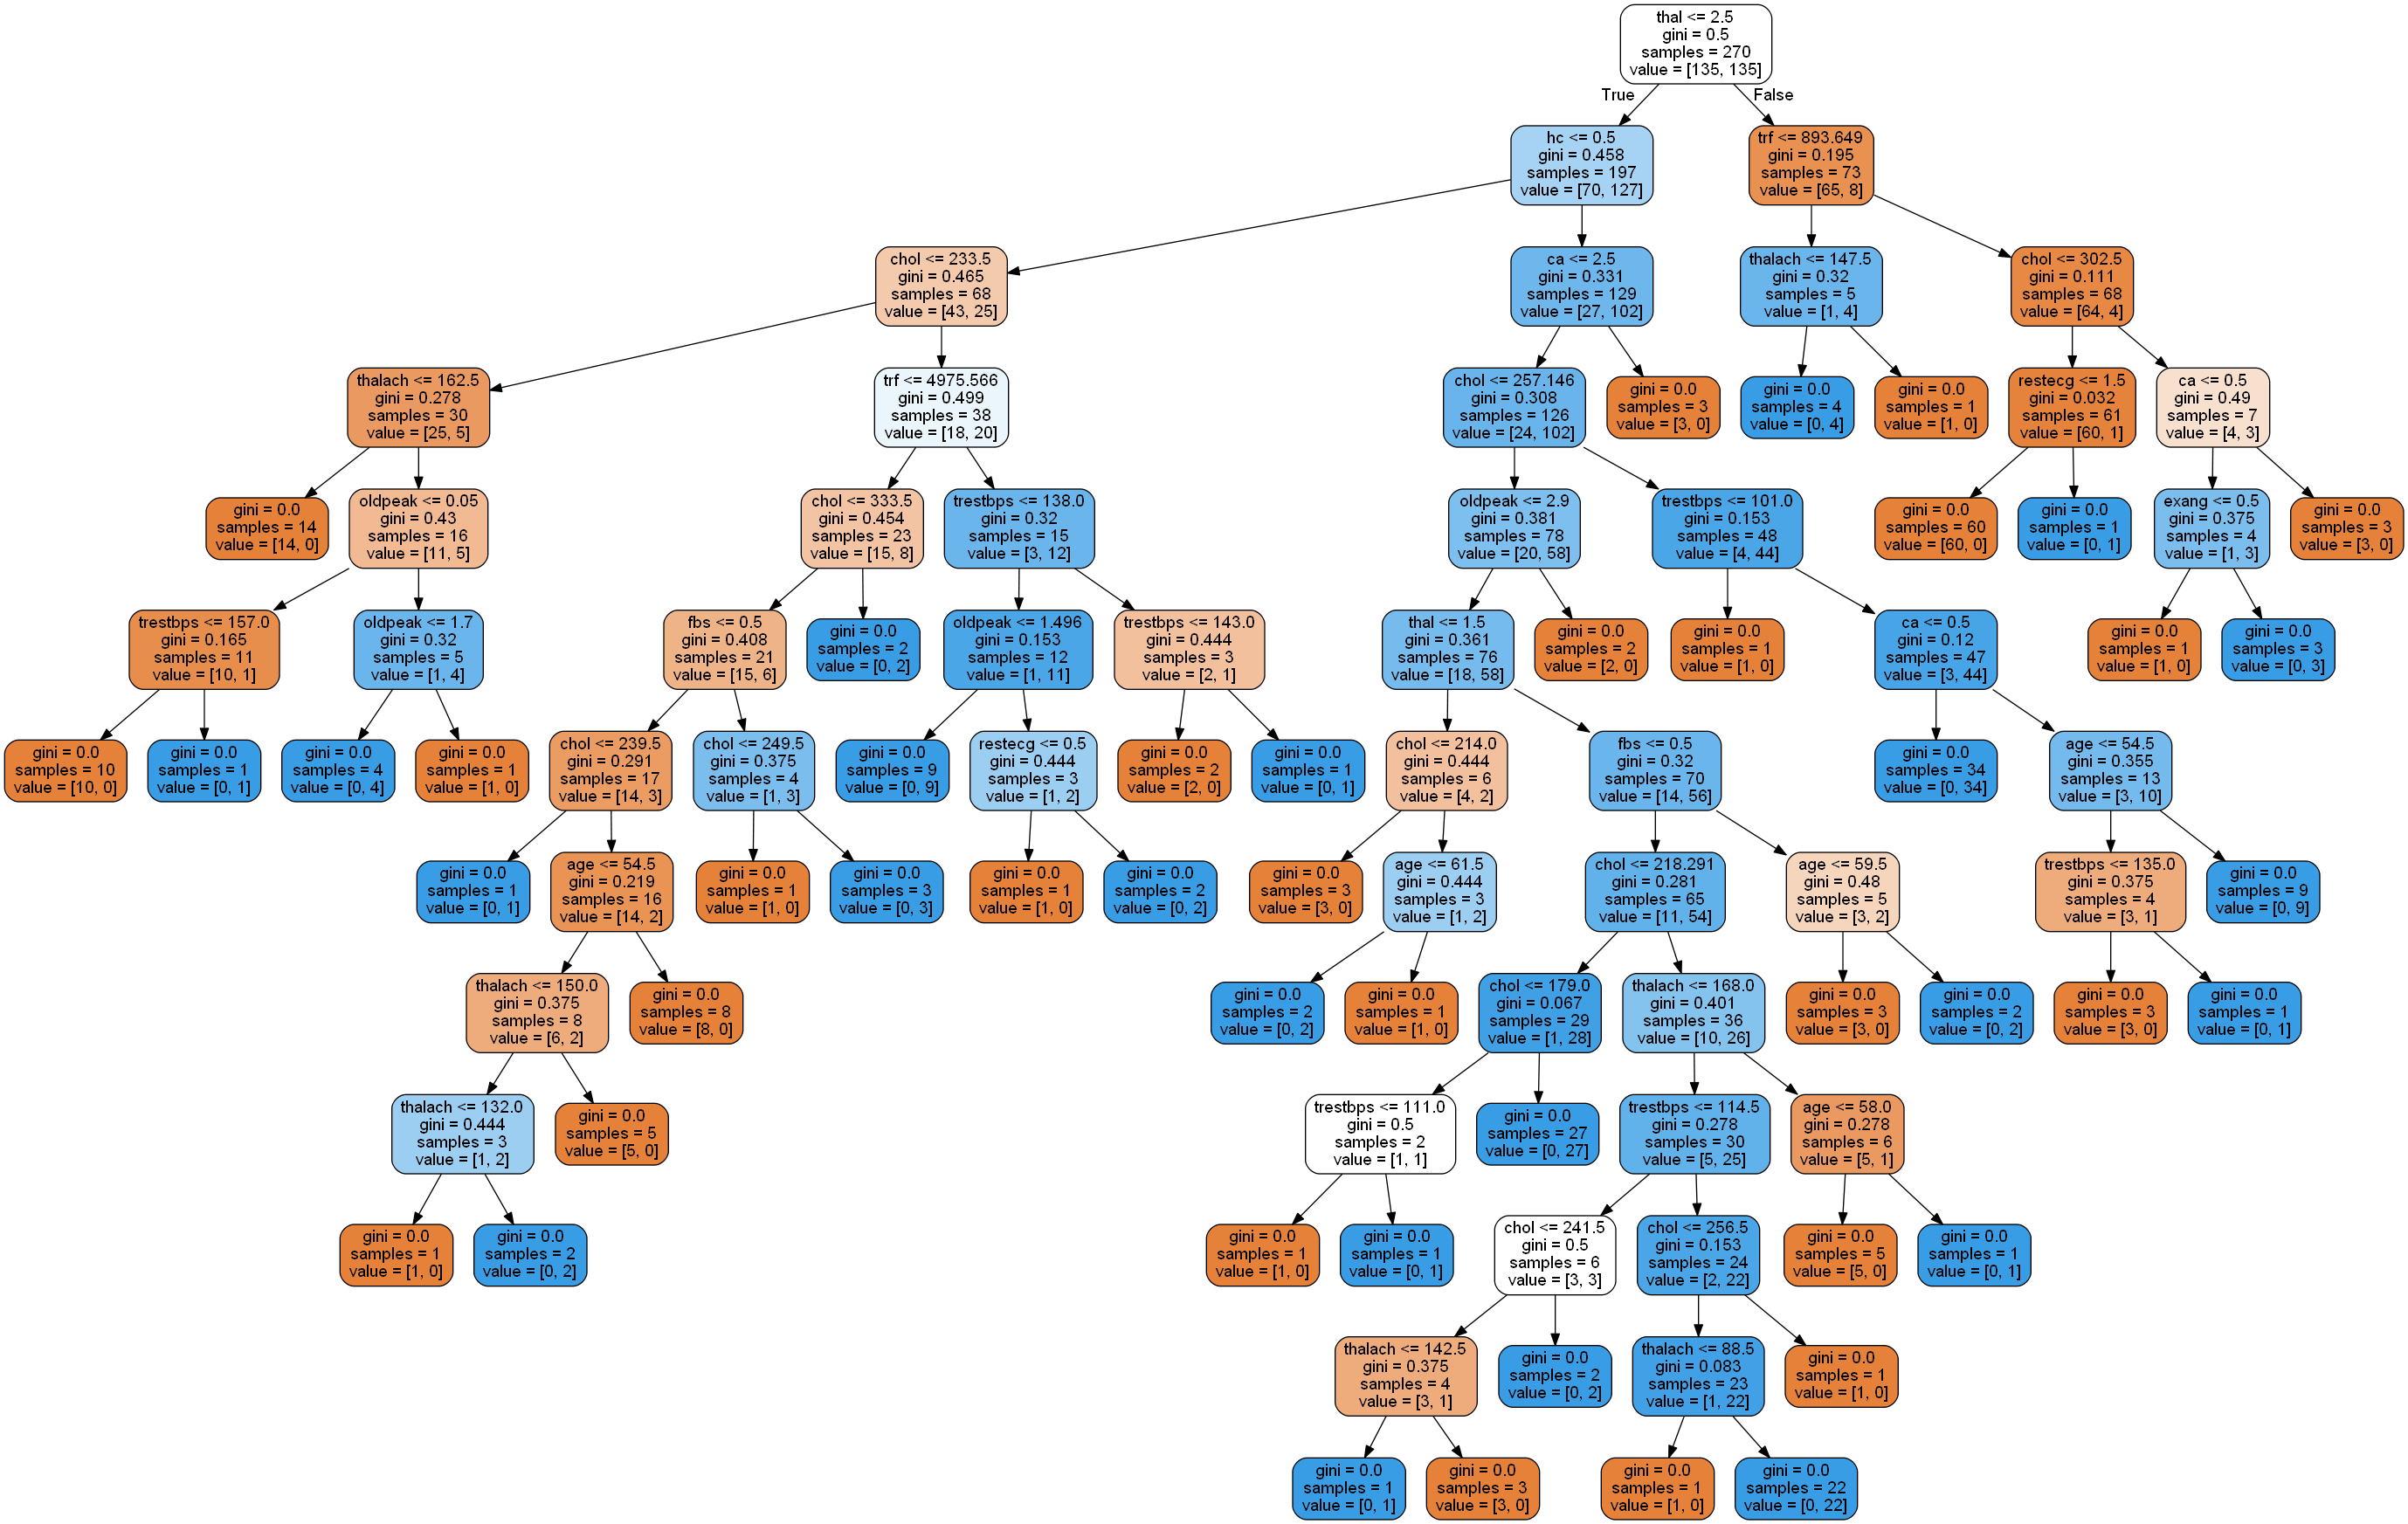

In [352]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [ ]:
# COmentários finais:
# O classificador selecionado por Grid Search teve excelente performance no conjunto de teinamento e boa performance 
# no conjunto de teste
# O classificador Random Forest selecionado tem os seguintes hiper parÂmetros

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Esse serão os hiper-parâmetros do modelo que será importado no arquivo sex_predictor.py

# Deste modo, o melhor classificador detectado na sessão de GridSearchm baseado em Random Forest foi o classificador acima,
# sem bootstrap, sem ponderação das classes, 
# adotando como critério de scoring a entropia, sem profundidade máxima dos classificadores-base(árvores de decisão)
# sem restrições quanto ao número m´[aximo de dados nos nó-folha das árvores de decisão,
# com um número mínimo de folhas igual a 1, com um número de árvoerws de decisão igual a 800 árvores
# sem Out-of -Bag scores - scores de cross validação Leave-One-Out, dentre outras opções que podem ser acima verificadas.